In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("DatosSeguros.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [4]:
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


In [9]:
edad = df.sort_values("edad")
edad.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
1097,18,F,31.350,4,no,Boyaca,4561.18850
59,18,M,31.680,2,yes,Cundinamarca,34303.16720
1251,18,M,33.330,0,no,Cundinamarca,1135.94070
297,18,M,22.990,0,no,Boyaca,1704.56810
1255,18,F,39.820,0,no,Cundinamarca,1633.96180
944,18,F,40.185,0,no,Boyaca,2217.46915
1152,18,F,30.305,0,no,Boyaca,2203.73595
665,18,M,33.660,0,no,Cundinamarca,1136.39940
52,18,F,35.625,0,no,Boyaca,2211.13075
650,18,M,28.500,0,no,Boyaca,1712.22700


In [10]:
edad = df.sort_values("edad",ascending=False)
edad.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
422,64,M,33.880,0,yes,Cundinamarca,46889.26120
754,64,M,37.905,0,no,Antioquia,14210.53595
404,64,F,32.965,0,no,Antioquia,14692.66935
420,64,M,39.160,1,no,Cundinamarca,14418.28040
380,64,F,30.115,3,no,Antioquia,16455.70785
1053,64,M,26.410,0,no,Boyaca,14394.55790
827,64,F,31.825,2,no,Boyaca,16069.08475
1248,64,M,36.960,2,yes,Cundinamarca,49577.66240
803,64,F,35.970,0,no,Cundinamarca,14313.84630
337,64,M,34.500,0,no,Caribe,13822.80300


In [11]:
rangos = [17,28,38,48,58,68]
nombrerango = ["A","B","C","D","E"]

In [12]:
df['Rango_Edad'] = pd.cut(df['edad'], rangos, labels=nombrerango)

In [13]:
df.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro,Rango_Edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B
7,31,F,25.740,0,no,Cundinamarca,3756.62160,B
8,46,F,33.440,1,no,Cundinamarca,8240.58960,C
9,37,F,27.740,3,no,Antioquia,7281.50560,B
10,37,M,29.830,2,no,Boyaca,6406.41070,B
11,60,F,25.840,0,no,Antioquia,28923.13692,E


In [14]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


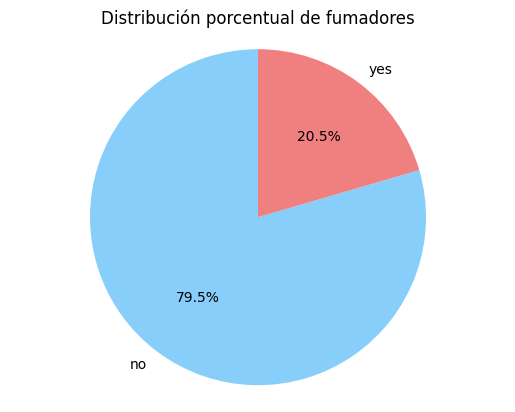

In [15]:
fig, ax = plt.subplots()

labels, counts = df["fumador"].value_counts().index, df["fumador"].value_counts().values

colors = ["lightskyblue", "lightcoral"]
ax.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

ax.set_title("Distribución porcentual de fumadores")
ax.axis("equal")
plt.show()

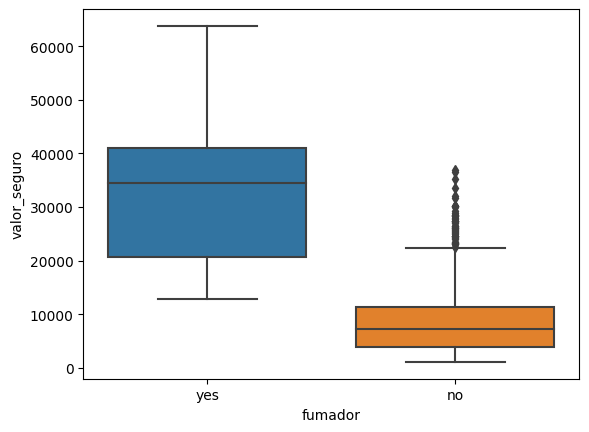

In [16]:
fumador_valor =sns.boxplot(x=df["fumador"],y=df["valor_seguro"])

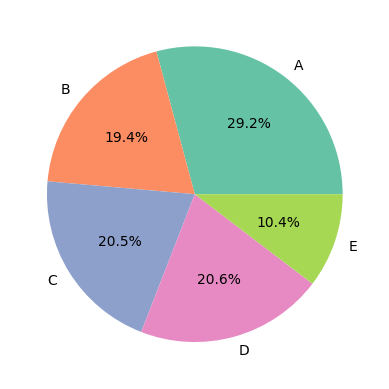

In [17]:
total_rango_edad = df['Rango_Edad'].groupby(df['Rango_Edad']).count()
labels = ["A", "B", "C", "D", "E"]
colors = sns.color_palette('Set2')[0:5]

plt.pie(total_rango_edad, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

<Axes: >

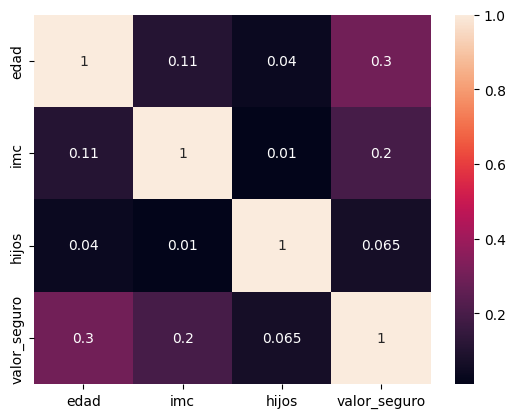

In [18]:
df_numeric = df.select_dtypes(include='number')

correlacion = df_numeric.corr()
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True)

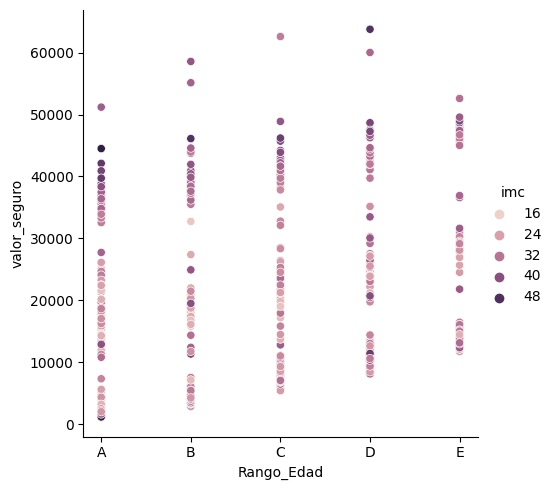

In [19]:
sns.relplot(x='Rango_Edad' ,y='valor_seguro',hue='imc',data=df)

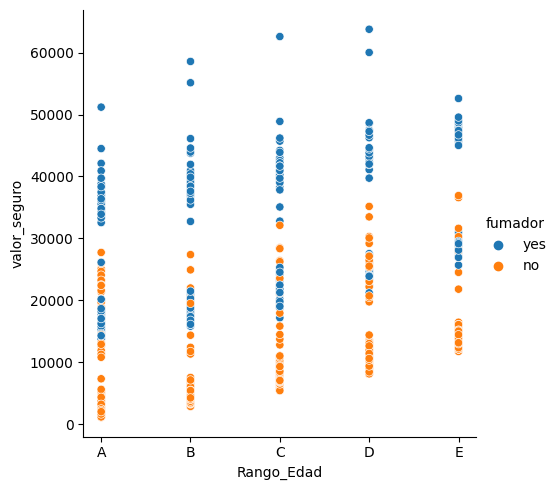

In [20]:
sns.relplot(x='Rango_Edad',
y='valor_seguro',hue='fumador',data=df)

<Axes: xlabel='region', ylabel='valor_seguro'>

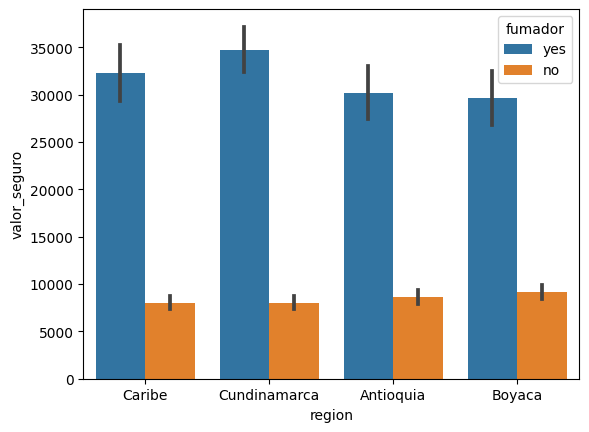

In [21]:
sns.barplot(data=df,x='region',y='valor_seguro',hue='fumador')